In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# 1.Thresholding

In [121]:
#import the image in greyscale
gray_path = "./numbers.jpg"
gray_img = cv.imread(gray_path,0)

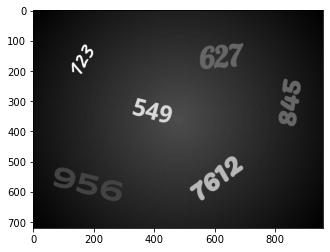

In [122]:
imgplot = plt.imshow(gray_img, cmap='gray')

In [123]:
#gray_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
#imgplot2 = plt.imshow(gray_img)
height, width = gray_img.shape

In [124]:
#threshold values
thresh = 55
thresh1 = 90
thresh2 = 150

Since the output image will only consist of 0 and 255, first initialize matrix with all 0s and then replace 0 will 255 where applicable

Binary threshold 55

(Text(0.5, 1.0, 'only 123 and 529 are segmented'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

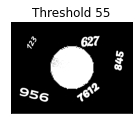

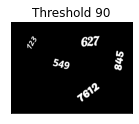

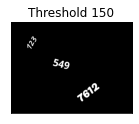

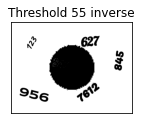

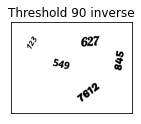

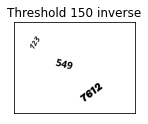

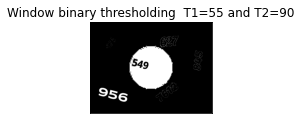

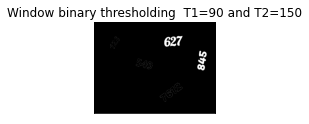

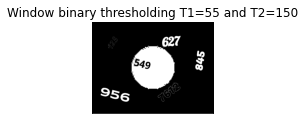

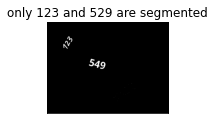

In [125]:
#Binary threshold 55
img_thresh55 = np.zeros((height, width), dtype=np.uint8)
for x in range(0, height):
    for y in range(0, width):
        if gray_img[x,y] > thresh:
            img_thresh55[x,y] = 255

#Binary threshold 90
img_thresh90 = np.zeros((height, width), dtype=np.uint8)
for x in range(0, height):
    for y in range(0, width):
        if gray_img[x,y] > thresh1:
            img_thresh90[x,y] = 255

#Binary threshold 150
img_thresh150 = np.zeros((height, width), dtype=np.uint8)
for x in range(0, height):
    for y in range(0, width):
        if gray_img[x,y] > thresh2:
            img_thresh150[x,y] = 255

#Inv. Binary threshold 55
img_thresh55_inv = np.zeros((height, width), dtype=np.uint8)
for x in range(0, height):
    for y in range(0, width):
        if gray_img[x,y] < thresh:
            img_thresh55_inv[x,y] = 255

#Inv. Binary threshold 90
img_thresh90_inv = np.zeros((height, width), dtype=np.uint8)
for x in range(0, height):
    for y in range(0, width):
        if gray_img[x,y] < thresh1:
            img_thresh90_inv[x,y] = 255

#Inv. Binary threshold 150
img_thresh150_inv = np.zeros((height, width), dtype=np.uint8)
for x in range(0, height):
    for y in range(0, width):
        if gray_img[x,y] < thresh2:
            img_thresh150_inv[x,y] = 255

            
#Window binary thresholding
#T1=55 and T2=90
img_thresh = np.zeros((height, width), dtype=np.uint8)
for x in range(0, height):
    for y in range(0, width):
        if 55 < gray_img[x,y] < 90:
            img_thresh[x,y] = 255

#Window binary thresholding            
#T1=90 and T2=150
img_thresh1 = np.zeros((height, width), dtype=np.uint8)
for x in range(0, height):
    for y in range(0, width):
        if 90 < gray_img[x,y] < 150:
            img_thresh1[x,y] = 255

#Window binary thresholding
#T1=55 and T2=150
img_thresh2 = np.zeros((height, width), dtype=np.uint8)
for x in range(0, height):
    for y in range(0, width):
        if 55 < gray_img[x,y] < 150:
            img_thresh2[x,y] = 255

#Window binary thresholding            
#Threshold at which the numbers 123 and 549 are visible
img_thresh3 = np.zeros((height, width), dtype=np.uint8)
for x in range(0, height):
    for y in range(0, width):
        if gray_img[x,y] > 200:
            img_thresh3[x,y] = 255
            
plt.figure(figsize=(10, 10))
plt.subplot(141), plt.imshow(img_thresh55, cmap="gray")
plt.title("Threshold 55"), plt.xticks([]), plt.yticks([]) 
plt.figure(figsize=(10, 10))
plt.subplot(141), plt.imshow(img_thresh90, cmap="gray")
plt.title("Threshold 90"), plt.xticks([]), plt.yticks([]) 
plt.figure(figsize=(10, 10))
plt.subplot(141), plt.imshow(img_thresh150, cmap="gray")
plt.title("Threshold 150"), plt.xticks([]), plt.yticks([]) 
plt.figure(figsize=(10, 10))
plt.subplot(141), plt.imshow(img_thresh55_inv, cmap="gray")
plt.title("Threshold 55 inverse"), plt.xticks([]), plt.yticks([]) 
plt.figure(figsize=(10, 10))
plt.subplot(141), plt.imshow(img_thresh90_inv, cmap="gray")
plt.title("Threshold 90 inverse"), plt.xticks([]), plt.yticks([]) 
plt.figure(figsize=(10, 10))
plt.subplot(141), plt.imshow(img_thresh150_inv, cmap="gray")
plt.title("Threshold 150 inverse"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(10, 10))
plt.subplot(141), plt.imshow(img_thresh, cmap="gray")
plt.title("Window binary thresholding  T1=55 and T2=90"), plt.xticks([]), plt.yticks([]) 
plt.figure(figsize=(10, 10))
plt.subplot(141), plt.imshow(img_thresh1, cmap="gray")
plt.title("Window binary thresholding  T1=90 and T2=150"), plt.xticks([]), plt.yticks([]) 
plt.figure(figsize=(10, 10))
plt.subplot(141), plt.imshow(img_thresh2, cmap="gray")
plt.title("Window binary thresholding T1=55 and T2=150"), plt.xticks([]), plt.yticks([]) 
plt.figure(figsize=(10, 10))
plt.subplot(141), plt.imshow(img_thresh3, cmap="gray")
plt.title("only 123 and 529 are segmented"), plt.xticks([]), plt.yticks([]) 

# 2. Denoising

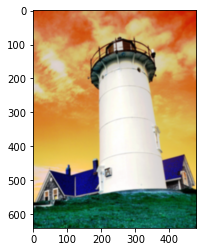

In [126]:
#Import image in greyscale
image1_path = "./lighthouse.png"
image1   = cv.imread(image1_path)
imgplot  = plt.imshow(image1, cmap='gray')
#Filter using 5x5 Gaussian filter with variance 2
blurGaus = cv.GaussianBlur(image1,(5,5),2)
imgplot1 = plt.imshow(blurGaus)

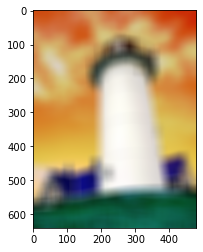

In [57]:
bBlurred = np.zeros((height, width), dtype=np.uint8)
#Filter image using Box filter
box_blur = cv.boxFilter(image1, -1, (36, 36))
imgplot2 = plt.imshow(box_blur)

In [58]:
psnr_bb = cv.PSNR(image1,box_blur)
psnr_gaus = cv.PSNR(image1,blurGaus)
print(psnr_bb)
print(psnr_gaus)
print("Gaussian filter has the better reconstruction")

#gaussian filter has the better reconstruction 

19.336667766361934
26.553756248803744
Gaussian filter has the better reconstruction


In [61]:
image2 = cv.imread('/Users/sameenmahtab/Documents/Fall 2020/ECSE 415/Assignment_1/images/saltandpepper_lighthouse.png')

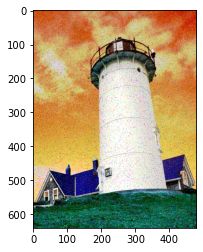

In [62]:
imgplot3 = plt.imshow(image2)

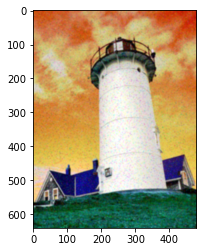

In [63]:
blurGaus_sp = cv.GaussianBlur(image2,(5,5),2)
imgplot4 = plt.imshow(blurGaus_sp)

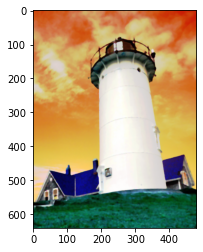

In [64]:
median_sp = cv.medianBlur(image2, 5)
imgplot5 = plt.imshow(median_sp)

In [65]:
psnr_bbsp = cv.PSNR(blurGaus_sp,box_blur)
psnr_medsp = cv.PSNR(median_sp,blurGaus)
print(psnr_bbsp)
print(psnr_medsp)
print("Median filter has the better reconstruction")


21.314154324761322
32.079382445377775
Median filter has the better reconstruction


# 3. Sobel edge detector

In [113]:
image = "./gaussian_cameraman.png"
image3 = cv.imread(image,0)

image3 = cv.imread('/Users/sameenmahtab/Documents/Fall 2020/ECSE 415/Assignment_1/images/cameraman.png',0)
image3_noisy = cv.imread('/Users/sameenmahtab/Documents/Fall 2020/ECSE 415/Assignment_1/images/gaussian_cameraman.png',0)

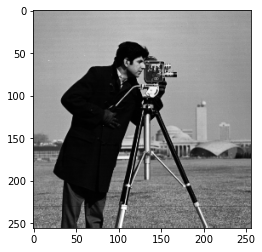

In [114]:
imgplot6 = plt.imshow(image3, cmap='gray')

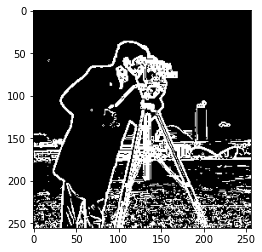

In [115]:
#3x3 kernel 
#10% Threshold
scale = 1
delta = 0
ddepth = cv.CV_64F
heightCam, widthCam = image3.shape
#Threshold the image
#Create a placeholder
img_thresh_camera = np.zeros((heightCam, widthCam), dtype=np.uint8)
            
#kernel size = 5
grad_x = cv.Sobel(image3, ddepth, 1, 0, ksize=3)
grad_y = cv.Sobel(image3, ddepth, 0, 1, ksize=3)

abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)

I_m = cv.magnitude(grad_x, grad_y)
I_p = cv.phase(grad_x, grad_y)

#threshold
maximum = np.max(I_m)
ret,thresh10 = cv.threshold(I_m, 0.1*maximum, 255, cv.THRESH_BINARY)
    
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

res = plt.imshow(thresh10, cmap='gray')

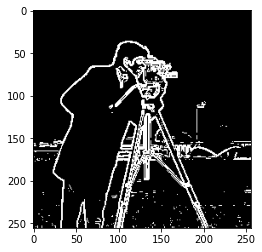

In [116]:
#3x3 kernel 
#20% Threshold
ret,thresh20 = cv.threshold(I_m, 0.2*maximum, 255, cv.THRESH_BINARY)
res1 = plt.imshow(thresh20, cmap='gray')

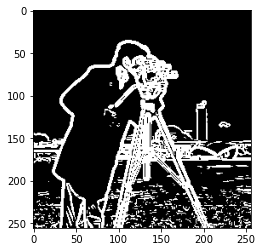

In [117]:
#kernel 5x5
#Thresh 10
scale = 1
delta = 0
ddepth = cv.CV_64F
heightCam, widthCam = image3.shape
#Threshold the image
#Create a placeholder
img_thresh_camera = np.zeros((heightCam, widthCam), dtype=np.uint8)
            
#kernel size = 5
grad_x = cv.Sobel(image3, ddepth, 1, 0, ksize=5)
grad_y = cv.Sobel(image3, ddepth, 0, 1, ksize=5)

abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)

I_m = cv.magnitude(grad_x, grad_y)
I_p = cv.phase(grad_x, grad_y)

#threshold
maximum = np.max(I_m)
ret,thresh10 = cv.threshold(I_m, 0.1*maximum, 255, cv.THRESH_BINARY)
    
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

res3 = plt.imshow(thresh10, cmap='gray')

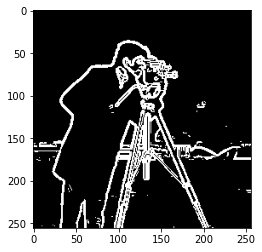

In [118]:
#5x5 kernel 
#20% Threshold
ret,thresh20 = cv.threshold(I_m, 0.2*maximum, 255, cv.THRESH_BINARY)
res4 = plt.imshow(thresh20, cmap='gray')

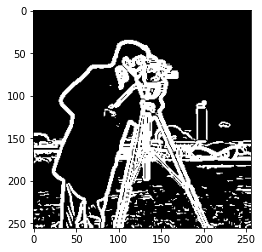

In [119]:
#7x7 kernel 
#10% Threshold
scale = 1
delta = 0
ddepth = cv.CV_64F
heightCam, widthCam = image3.shape
#Threshold the image
#Create a placeholder
img_thresh_camera = np.zeros((heightCam, widthCam), dtype=np.uint8)
            
#kernel size = 5
grad_x = cv.Sobel(image3, ddepth, 1, 0, ksize=7)
grad_y = cv.Sobel(image3, ddepth, 0, 1, ksize=7)

abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)

I_m = cv.magnitude(grad_x, grad_y)
I_p = cv.phase(grad_x, grad_y)

#threshold
maximum = np.max(I_m)
ret,thresh10 = cv.threshold(I_m, 0.1*maximum, 255, cv.THRESH_BINARY)
    
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

res5 = plt.imshow(thresh10, cmap='gray')

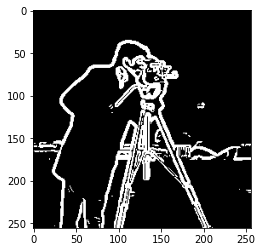

In [120]:
#5x5 kernel 
#20% Threshold
ret,thresh20 = cv.threshold(I_m, 0.2*maximum, 255, cv.THRESH_BINARY)
res6 = plt.imshow(thresh20, cmap='gray')

Increasing the filter size increases the number of pixels in the convolution operation this in turn causes the edges of the resulting image to be more blurred.

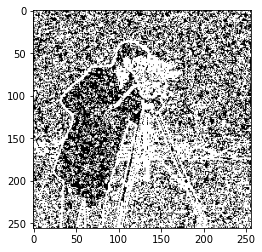

In [85]:
#Noisy cameraman image
#3x3 kernel 
#10% Threshold
scale = 1
delta = 0
ddepth = cv.CV_64F
heightCam, widthCam = image3.shape
#Threshold the image
#Create a placeholder

img_thresh_camera = np.zeros((heightCam, widthCam), dtype=np.uint8)
            
#kernel size = 5
grad_x = cv.Sobel(image3_noisy, ddepth, 1, 0, ksize=3)
grad_y = cv.Sobel(image3_noisy, ddepth, 0, 1, ksize=3)

abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)

I_m = cv.magnitude(grad_x, grad_y)
I_p = cv.phase(grad_x, grad_y)

#threshold
maximum = np.max(I_m)
ret,thresh10 = cv.threshold(I_m, 0.1*maximum, 255, cv.THRESH_BINARY)
    
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

res7 = plt.imshow(thresh10, cmap='gray')

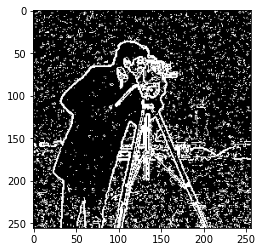

In [86]:
#For noisy image
#3x3 kernel 
#20% Threshold
ret,thresh20 = cv.threshold(I_m, 0.2*maximum, 255, cv.THRESH_BINARY)
res8 = plt.imshow(thresh20, cmap='gray')

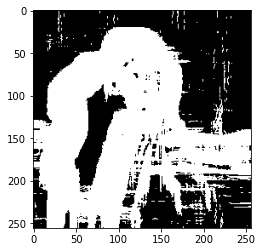

In [88]:
#denoise the image
box_cam = cv.boxFilter(image3_noisy, -1, (36, 36))

#Noisy cameraman image
#3x3 kernel 
#10% Threshold
scale = 1
delta = 0
ddepth = cv.CV_64F
heightCam, widthCam = image3.shape
#Threshold the image
#Create a placeholder

img_thresh_camera = np.zeros((heightCam, widthCam), dtype=np.uint8)
            
#kernel size = 5
grad_x = cv.Sobel(box_cam, ddepth, 1, 0, ksize=3)
grad_y = cv.Sobel(box_cam, ddepth, 0, 1, ksize=3)

abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)

I_m = cv.magnitude(grad_x, grad_y)
I_p = cv.phase(grad_x, grad_y)

#threshold
maximum = np.max(I_m)
ret,thresh10 = cv.threshold(I_m, 0.1*maximum, 255, cv.THRESH_BINARY)
    
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

res9 = plt.imshow(thresh10, cmap='gray')

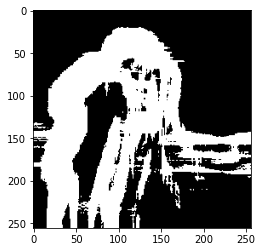

In [89]:
#For noisy image with box filter
#3x3 kernel 
#20% Threshold
ret,thresh20 = cv.threshold(I_m, 0.2*maximum, 255, cv.THRESH_BINARY)
res10 = plt.imshow(thresh20, cmap='gray')

# 4. Canny Edge Detection

 Four steps for Canny edge detection
1. Gaussian blur
2. Find intensity of gradients
3. Carry out non-maximum suppression
4. Edge tracking by Hysteresis

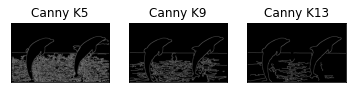

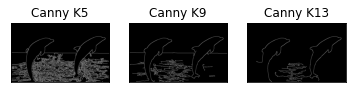

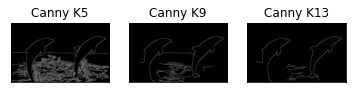

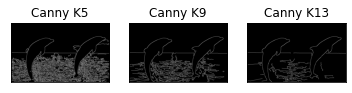

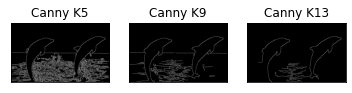

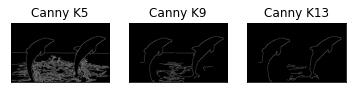

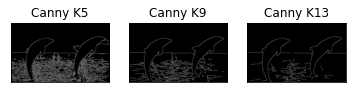

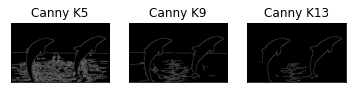

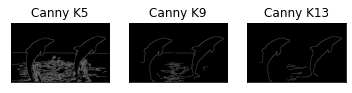

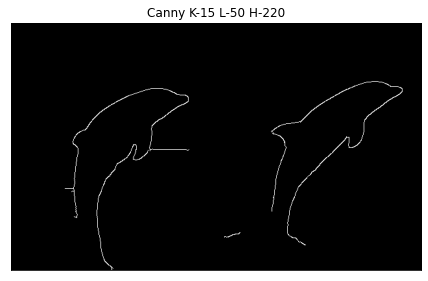

In [112]:
path_dol = "./dolphin.jpg"
img_dol = cv.imread(path_dol,0)

# Apply Gaussian blur to the image
imgDol1 = cv.GaussianBlur(img_dol, (5, 5), 0)
imgDol2 = cv.GaussianBlur(img_dol, (9, 9), 0)
imgDol3 = cv.GaussianBlur(img_dol, (13, 13), 0)

# compute Canny edges 
image_canny1 = cv.Canny(imgDol1, 10, 100)
image_canny2 = cv.Canny(imgDol2, 10, 100)
image_canny3 = cv.Canny(imgDol3, 10, 100)

image_canny4 = cv.Canny(imgDol1, 10, 150)
image_canny5 = cv.Canny(imgDol2, 10, 150)
image_canny6 = cv.Canny(imgDol3, 10, 150)

image_canny7 = cv.Canny(imgDol1, 10, 200)
image_canny8 = cv.Canny(imgDol2, 10, 200)
image_canny9 = cv.Canny(imgDol3, 10, 200)

image_canny10 = cv.Canny(imgDol1, 30, 100)
image_canny11 = cv.Canny(imgDol2, 30, 100)
image_canny12 = cv.Canny(imgDol3, 30, 100)

image_canny13 = cv.Canny(imgDol1, 30, 150)
image_canny14 = cv.Canny(imgDol2, 30, 150)
image_canny15 = cv.Canny(imgDol3, 30, 150)

image_canny16 = cv.Canny(imgDol1, 30, 200)
image_canny17 = cv.Canny(imgDol2, 30, 200)
image_canny18 = cv.Canny(imgDol3, 30, 200)

image_canny19 = cv.Canny(imgDol1, 50, 100)
image_canny20 = cv.Canny(imgDol2, 50, 100)
image_canny21 = cv.Canny(imgDol3, 50, 100)

image_canny22 = cv.Canny(imgDol1, 50, 150)
image_canny23 = cv.Canny(imgDol2, 50, 150)
image_canny24 = cv.Canny(imgDol3, 50, 150)

image_canny25 = cv.Canny(imgDol1, 50, 200)
image_canny26 = cv.Canny(imgDol2, 50, 200)
image_canny27 = cv.Canny(imgDol3, 50, 200)

Image_edge28 = cv.Canny(imgDol4, 50, 220)


plt.subplot(131), plt.imshow(image_canny1, cmap="gray")
plt.title("Canny K5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_canny2, cmap="gray")
plt.title("Canny K9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(image_canny3, cmap="gray")
plt.title("Canny K13"), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(131), plt.imshow(image_canny4, cmap="gray")
plt.title("Canny K5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_canny5, cmap="gray")
plt.title("Canny K9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(image_canny6, cmap="gray")
plt.title("Canny K13"), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(131), plt.imshow(image_canny7, cmap="gray")
plt.title("Canny K5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_canny8, cmap="gray")
plt.title("Canny K9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(image_canny9, cmap="gray")
plt.title("Canny K13"), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(131), plt.imshow(image_canny10, cmap="gray")
plt.title("Canny K5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_canny11, cmap="gray")
plt.title("Canny K9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(image_canny12, cmap="gray")
plt.title("Canny K13"), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(131), plt.imshow(image_canny13, cmap="gray")
plt.title("Canny K5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_canny14, cmap="gray")
plt.title("Canny K9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(image_canny15, cmap="gray")
plt.title("Canny K13"), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(131), plt.imshow(image_canny16, cmap="gray")
plt.title("Canny K5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_canny17, cmap="gray")
plt.title("Canny K9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(image_canny18, cmap="gray")
plt.title("Canny K13"), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(131), plt.imshow(image_canny19, cmap="gray")
plt.title("Canny K5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_canny20, cmap="gray")
plt.title("Canny K9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(image_canny21, cmap="gray")
plt.title("Canny K13"), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(131), plt.imshow(image_canny22, cmap="gray")
plt.title("Canny K5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_canny23, cmap="gray")
plt.title("Canny K9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(image_canny24, cmap="gray")
plt.title("Canny K13"), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(131), plt.imshow(image_canny25, cmap="gray")
plt.title("Canny K5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_canny26, cmap="gray")
plt.title("Canny K9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(image_canny27, cmap="gray")
plt.title("Canny K13"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(25, 25))
plt.subplot(131), plt.imshow(Image_edge28, cmap="gray")
plt.title("Canny K-15 L-50 H-220"), plt.xticks([]), plt.yticks([])
plt.show()

As k is increases the edges are segmented less. As the threshold is increased, the smaller edges are not detected, the more prominent edges(the ones with the highest gradients) only remain. 


# 5. Harris Corner Detection

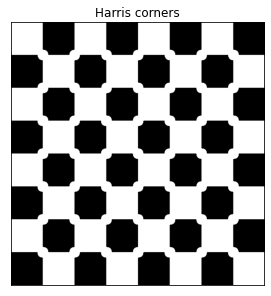

In [102]:
#import the image
check_b = cv.imread('/Users/sameenmahtab/Documents/Fall 2020/ECSE 415/Assignment_1/images/checkerboard.png',0)
img_disp = check_b.copy()
#detect harris corners
#k=0.05
corners = cv.cornerHarris(check_b, 2, 3, 0.05)

#Normalize the map [0,1] 
cv.normalize(corners, corners, 0, 2, cv.NORM_MINMAX)

#threshold for an optimal value
thresh = 1.0

loc = np.where(corners >= thresh)

#loop through the points
for pt in zip(*loc[::-1]):
    cv.circle(img_disp, pt, 15, (255,0,0), -1)
    
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img_disp)
plt.title("Harris corners"), plt.xticks([]), plt.yticks([])
plt.show

Harris =plt.imshow(img_disp, cmap= 'gray')

 
  

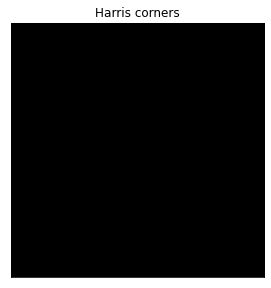

In [106]:
#import the image
shapes_path = 
shapes = cv.imread('/Users/sameenmahtab/Documents/Fall 2020/ECSE 415/Assignment_1/images/shapes.png',0)
img_disp = shapes.copy()
#detect harris corners
#k=0.05
corners = cv.cornerHarris(shapes, 2, 3, 0.05)

#Normalize the map [0,1] 
cv.normalize(corners, corners, 0, 2, cv.NORM_MINMAX)

#threshold for an optimal value
thresh = 0.1

loc = np.where(corners >= thresh)

#loop through the points
for pt in zip(*loc[::-1]):
    cv.circle(img_disp, pt, 15, (255,0,0), -1)
    
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img_disp)
plt.title("Harris corners"), plt.xticks([]), plt.yticks([])
plt.show

Harris =plt.imshow(img_disp, cmap= 'gray')
